# Spotify Data Exploration

## Purpose of Notebook
This notebook is an exploratory data analysis of my Spotify music library.  We aren't fitting any models here, just combing through the data to learn about it (and maybe learn a bit about myself). 


## Related Notebooks

+ [Part 1](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-retrieval.ipynb) walks through collecting liked tracks using Spotipy as a Python wrapper for the Spotify API and attaching audio features to each track and storing in a dataframe.
+ **[Part 2](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-exploration.ipynb)** is an exploratory data analysis of my liked tracks
+ [Part 3](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-clustering.ipynb) attempts to finds genres in my liked tracks using K-Means clustering from 

## Resources


In [63]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
from IPython.display import IFrame  # for embedding Spotify player

In [64]:
df = pd.read_csv('data/saved-songs.csv')

The Spotify API allows you to embed the Spotify player and play tracks.  So let's take a look (or really a listen) to some tracks!  

We will be forming clusters based on the following musical features that Spotify has for each song.  The main audio features we will explore are described in the [Audio Features Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) and [Track Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).  The first few audio features are fairly intuitive: `tempo`, `duration_ms`, `key`, `mode`:

+ `tempo` - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
+ `duration_ms` - The duration of the track in milliseconds.
+ `key` - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
+ `mode` - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Spotify provides some audio features that try to quantify various qualities of a song.  The API documentation gives a description for each below.  Many of the audio features are a combination of other musical elements -- e.g. `danceability` is a combination of tempo, rhythm stability, beat strength, and overall regularity.  How musical elements are combined and weighted is not given so we will need to get some intuitive sense of each audio feature somehow.

+ `popularity` - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
+ `acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
+ `danceability` - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
+ `energy` - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
+ `instrumentalness` - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
+ `liveness` - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
+ `loudness` - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
+ `speechiness` - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
+ `valence` - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).




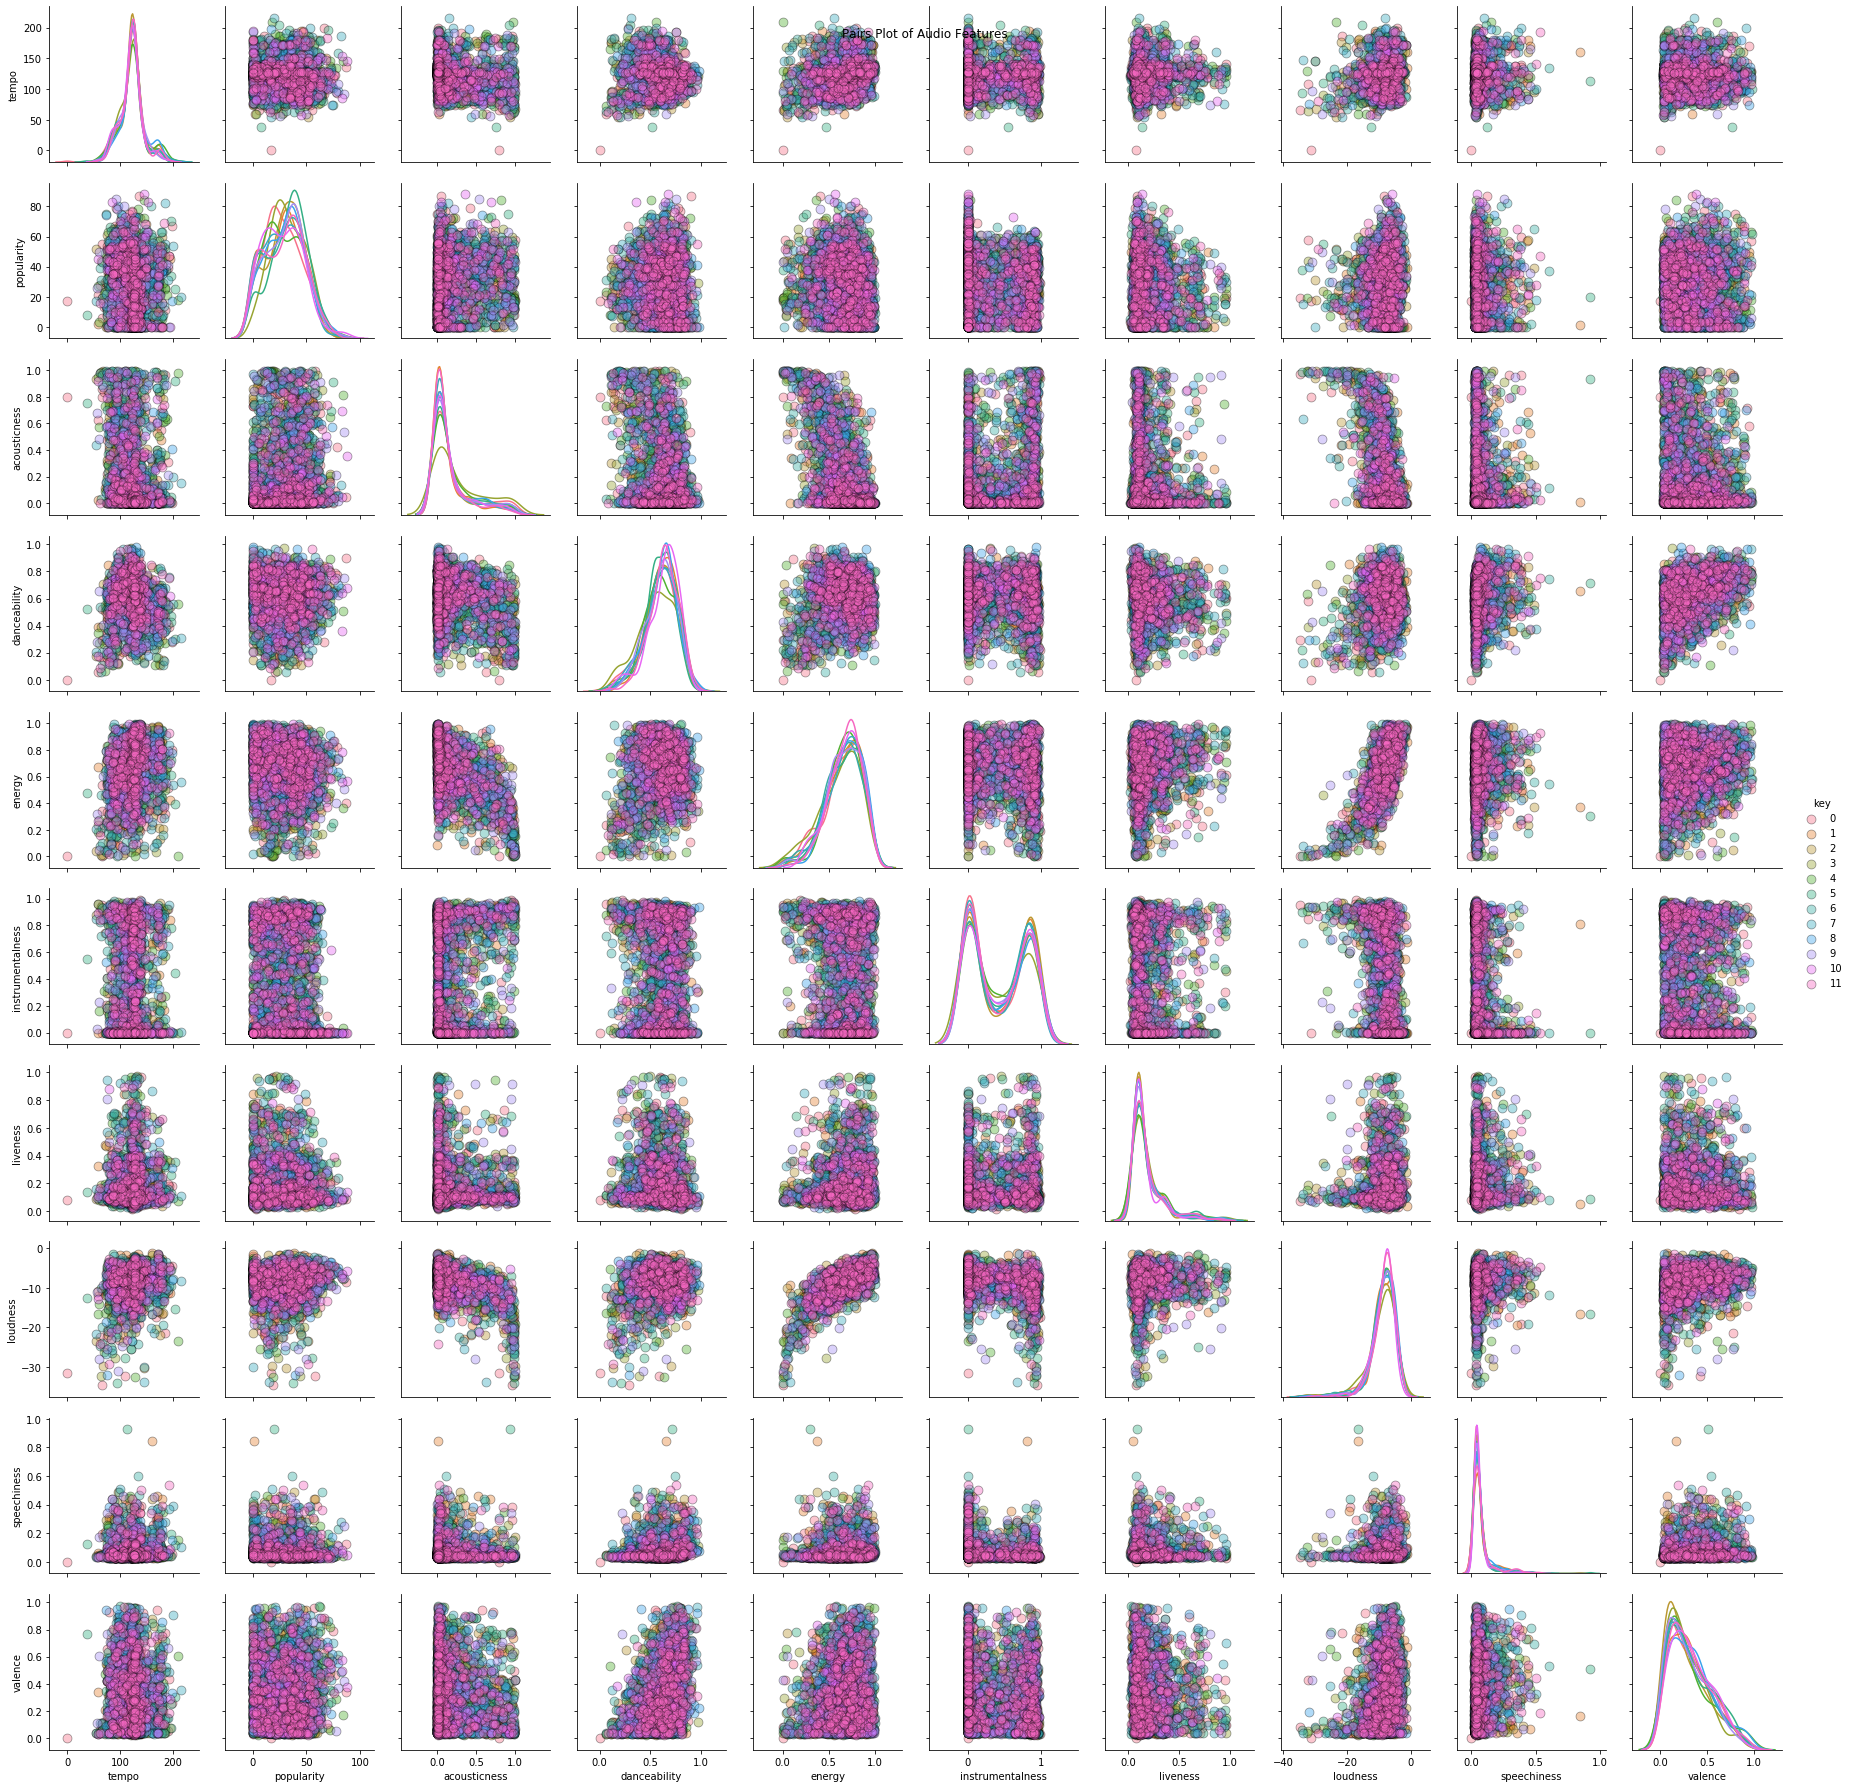

In [13]:
# Create pairsplot using seaborn with `key` as a factor
sns.pairplot(df, hue = 'key', 
             diag_kind = 'kde',
             diag_kws = dict(shade=False),
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             vars=['tempo', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','valence']); 
plt.suptitle('Pairs Plot of Audio Features');

In [65]:
# Formatting for Spotify web players
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

## Acousticness

> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [66]:
print("Acousticness = ", df['acousticness'].max(), "\t", df.loc[df['acousticness'].idxmax(), 'artist_name'], "-", df.loc[df['acousticness'].idxmax(), 'track_name'])
print("Acousticness = ", df['acousticness'].min(), df.loc[df['acousticness'].idxmin(), 'artist_name'], "-", df.loc[df['acousticness'].idxmin(), 'track_name'])

Acousticness =  0.995 	 Ólafur Arnalds - momentary
Acousticness =  5.34e-06 Luttrell - Don’t Forget To Breathe (ABGTN2017)


In [67]:
# Tracks with the max and min 'acousticness' value
df['acousticness'].max() # Highest confidence track is acoustic
acousticness_max = df.loc[df['acousticness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + acousticness_max

df['acousticness'].min() # Lowest confidence track is acoustic
acousticness_min = df.loc[df['acousticness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + acousticness_min

display(IFrame(src=url_min, width=300, height=80, id="right_frame"))
display(IFrame(src=url_max, width=300, height=80, id="left_frame"))


## Danceability

> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

In [68]:
print("danceability = ", round(df['danceability'].max(), 3), "\t", df.loc[df['danceability'].idxmax(), 'artist_name'], "-", df.loc[df['danceability'].idxmax(), 'track_name'])
print("danceability = ", round(df['danceability'].min(), 3),"\t", df.loc[df['danceability'].idxmin(), 'artist_name'], "-", df.loc[df['danceability'].idxmin(), 'track_name'])

danceability =  0.979 	 Tiësto - Always Near - (Extended Tiësto Beat Mix)
danceability =  0.0 	 Lido - You Lost Your Keys


In [69]:
# Tracks with the max and min 'danceability' value
df['danceability'].max() # Highest confidence track is acoustic
max = df.loc[df['danceability'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['danceability'].min() # Lowest confidence track is acoustic
min = df.loc[df['danceability'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## Energy

> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [70]:
print("energy = ", round(df['energy'].max(), 3), "\t", df.loc[df['energy'].idxmax(), 'artist_name'], "-", df.loc[df['energy'].idxmax(), 'track_name'])
print("energy = ", round(df['energy'].min(), 3),"\t", df.loc[df['energy'].idxmin(), 'artist_name'], "-", df.loc[df['energy'].idxmin(), 'track_name'])

energy =  0.998 	 Ferry Corsten - A Slice of Heaven
energy =  0.002 	 Camille Saint-Saëns - Saint-Saëns: Le carnaval des animaux, R. 125: VIII. Personnages à longues oreilles


In [71]:
# Tracks with the max and min 'energy' value
df['energy'].max() # Highest confidence track is acoustic
max = df.loc[df['energy'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['energy'].min() # Lowest confidence track is acoustic
min = df.loc[df['energy'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## Instrumentalness

> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [72]:
print("instrumentalness = ", round(df['instrumentalness'].max(), 3), "\t", df.loc[df['instrumentalness'].idxmax(), 'artist_name'], "-", df.loc[df['instrumentalness'].idxmax(), 'track_name'])
print("instrumentalness = ", round(df['instrumentalness'].min(), 3), "\t", df.loc[df['instrumentalness'].idxmin(), 'artist_name'], "-", df.loc[df['instrumentalness'].idxmin(), 'track_name'])

instrumentalness =  0.989 	 Above & Beyond - Eternal
instrumentalness =  0.0 	 Porter Robinson - Shelter


In [73]:
# Tracks with the max and min 'instrumentalness' value
df['instrumentalness'].max() # Highest confidence track is acoustic
max = df.loc[df['instrumentalness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['instrumentalness'].min() # Lowest confidence track is acoustic
min = df.loc[df['instrumentalness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## Liveness

> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [74]:
print("liveness = ", round(df['liveness'].max(), 3), "\t", df.loc[df['liveness'].idxmax(), 'artist_name'], "-", df.loc[df['liveness'].idxmax(), 'track_name'])
print("liveness = ", round(df['liveness'].min(), 3), "\t", df.loc[df['liveness'].idxmin(), 'artist_name'], "-", df.loc[df['liveness'].idxmin(), 'track_name'])

liveness =  0.992 	 Metallica - One - Live with the SFSO
liveness =  0.016 	 Rough Cut - Get It


In [75]:
# Tracks with the max and min 'liveness' value
df['liveness'].max() # Highest confidence track is acoustic
max = df.loc[df['liveness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['liveness'].min() # Lowest confidence track is acoustic
min = df.loc[df['liveness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## Loudness

> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

In [76]:
print("loudness = ", round(df['loudness'].max(), 3), "\t", df.loc[df['loudness'].idxmax(), 'artist_name'], "-", df.loc[df['loudness'].idxmax(), 'track_name'])
print("loudness = ", round(df['loudness'].min(), 3), "\t", df.loc[df['loudness'].idxmin(), 'artist_name'], "-", df.loc[df['loudness'].idxmin(), 'track_name'])

loudness =  -1.171 	 Bassnectar - Chromatek
loudness =  -34.636 	 Camille Saint-Saëns - Saint-Saëns: Le carnaval des animaux, R. 125: IV. Tortues


In [77]:
# Tracks with the max and min 'loudness' value
df['loudness'].max() # Highest confidence track is acoustic
max = df.loc[df['loudness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['loudness'].min() # Lowest confidence track is acoustic
min = df.loc[df['loudness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## Speechiness

> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [78]:
print("speechiness = ", round(df['speechiness'].max(), 3), "\t", df.loc[df['speechiness'].idxmax(), 'artist_name'], "-", df.loc[df['speechiness'].idxmax(), 'track_name'])
print("speechiness = ", round(df['speechiness'].min(), 3), "\t", df.loc[df['speechiness'].idxmin(), 'artist_name'], "-", df.loc[df['speechiness'].idxmin(), 'track_name'])

speechiness =  0.926 	 Jon Benjamin - Jazz Daredevil - Deal With the Devil
speechiness =  0.0 	 Lido - You Lost Your Keys


In [79]:
# Tracks with the max and min 'speechiness' value
df['speechiness'].max() # Highest confidence track is acoustic
max = df.loc[df['speechiness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['speechiness'].min() # Lowest confidence track is acoustic
min = df.loc[df['speechiness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## Valence

> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [80]:
print("valence = ", round(df['valence'].max(), 3), "\t", df.loc[df['valence'].idxmax(), 'artist_name'], "-", df.loc[df['valence'].idxmax(), 'track_name'])
print("valence = ", round(df['valence'].min(), 3), "\t", df.loc[df['valence'].idxmin(), 'artist_name'], "-", df.loc[df['valence'].idxmin(), 'track_name'])

valence =  0.975 	 Capital Cities - Kangaroo Court
valence =  0.0 	 Lido - You Lost Your Keys


In [81]:
# Tracks with the max and min 'valence' value
df['valence'].max() # Highest confidence track is acoustic
max = df.loc[df['valence'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['valence'].min() # Lowest confidence track is acoustic
min = df.loc[df['valence'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

In [1]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Retreive client_id and _client_secret from environment variables
client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [6]:
# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='artist:Lane 8', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
      
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)



Time to run this code (in seconds): 3.5328616299957503


In [7]:
print('number of elements in track_id list:', len(track_id))

number of elements in track_id list: 338


In [8]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name, 
                          'track_name':track_name, 
                          'track_id':track_id, 
                          'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(338, 4)


,artist_name,track_name,track_id,popularity
0,Lane 8,Ghost Voices (Lane 8 Remix),4ApmPo6H0bH7PExQV25LDh,56
1,Lane 8,Atlas,4gx9edHLyQtb69ibMUyTxJ,58
2,Lane 8,Little by Little,5kDeYoYdLnW8ILTXdbiXjJ,59
3,Lane 8,Visions,4TANuW9cpKCGqH499rr9re,56
4,Lane 8,Fingerprint,7ixuc4KOSHm0BsrwsRLM3i,56


In [9]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
artist_name    338 non-null object
track_name     338 non-null object
track_id       338 non-null object
popularity     338 non-null int64
dtypes: int64(1), object(3)
memory usage: 10.6+ KB


In [12]:
df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()

artist_name    156
track_name     156
track_id       156
popularity     156
dtype: int64

In [15]:
# group the entries by artist_name and track_name and check for duplicates

duplicates = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
print("Number of duplicate tracks: ", duplicates[duplicates > 1].count() )


Number of duplicate tracks:  0


In [14]:
df_tracks.drop_duplicates(subset=['artist_name', 'track_name'], inplace=True)